In [12]:
import numpy as np

### 2D Convolution Network 

In [77]:
class Conv2D:
    def __init__(self, input_channels, output_channels, kernel_size):
        self.kernel_size = kernel_size
        self.output_channels = output_channels
        self.kernel = np.random.randn(output_channels, kernel_size, kernel_size, input_channels)
        
    def __call__(self, x):
        # x : (batch, height, width, input_channels)
        batch, height, width, input_channels = x.shape
        output_height = height - self.kernel_size + 1
        output_width = width - self.kernel_size + 1
        y = np.zeros((batch, output_height, output_width, self.output_channels))
        
        for k in range(self.output_channels):
            # (1, kernel_size, kernel_size, input_channels)
            k_ = self.kernel[k:k+1, :, :, :]
            for i in range(0, height - self.kernel_size):
                for j in range(0, width - self.kernel_size):
                    # (batch, kernel_size, kernel_size, input_channels)
                    x_ = x[:, i:i+self.kernel_size, j:j+self.kernel_size, :]
                    # (batch)
                    y_ = np.sum(k_ * x_, axis=(1,2,3))
                    y[:, i, j, k] = y_
                    
        return y
                

### Test

In [78]:
x = np.random.randn(2, 64, 64, 3)
conv2d = Conv2D(input_channels=3, output_channels=16, kernel_size=3)
y = conv2d(x)
print(y.shape)

(2, 62, 62, 16)


### MNIST

In [79]:
import tensorflow as tf
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.

In [80]:
x = train_images[0:16, :, :, None]
y = Conv2D(input_channels=1, output_channels=16, kernel_size=3)(x)
print(x.shape, y.shape)

(16, 28, 28, 1) (16, 26, 26, 16)


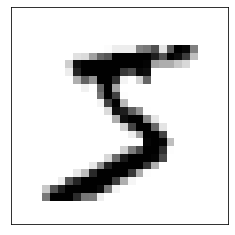

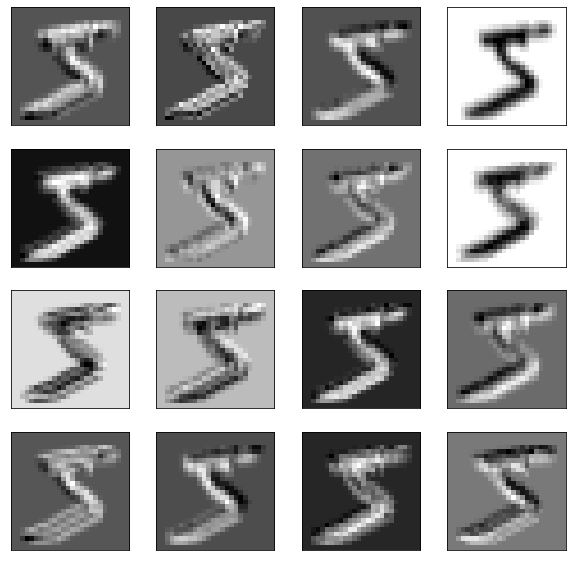

In [83]:
import matplotlib.pyplot as plt

plt.imshow(x[0, :, :, 0], cmap=plt.cm.binary)
plt.xticks([]);plt.yticks([])
plt.show()

plt.figure(figsize=[10, 10])
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(y[0, :, :, i], cmap=plt.cm.binary)
    plt.xticks([]);plt.yticks([])
plt.show()

### 2D Convolution Transpose Network 

In [7]:
import numpy as np

class Conv2DTranspose:
    def __init__(self, input_channels, output_channels, kernel_size):
        self.kernel_size = kernel_size
        self.output_channels = output_channels
        self.kernel = np.random.randn(output_channels, kernel_size, kernel_size, input_channels)
        
    def __call__(self, x):
        # x : (batch, height, width, input_channels)
        batch, height, width, input_channels = x.shape
        output_height = height + self.kernel_size - 1
        output_width = width + self.kernel_size - 1
        y = np.zeros((batch, output_height, output_width, self.output_channels))
        
        for k in range(self.output_channels):
            # (1, kernel_size, kernel_size, input_channels)
            k_ = self.kernel[k:k+1, :, :, :]
            for i in range(0, height):
                for j in range(0, width):
                    # (batch, 1, 1, input_channels)
                    x_ = x[:, i:i+1, j:j+1, :]
                    # (batch, kernel_size, kernel_size)
                    y_ = np.sum(k_ * x_, axis=3)
                    y[:, i:i+self.kernel_size, j:j+self.kernel_size, k] += y_
                    
        return y
                

In [8]:
x = np.random.randn(2, 64, 64, 3)
conv2d_transpose = Conv2DTranspose(input_channels=3, output_channels=16, kernel_size=3)
y = conv2d_transpose(x)
print(y.shape)

(2, 66, 66, 16)


(16, 28, 28, 1) (16, 30, 30, 16)


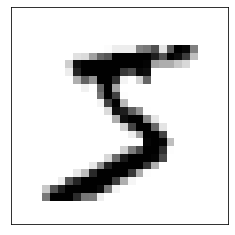

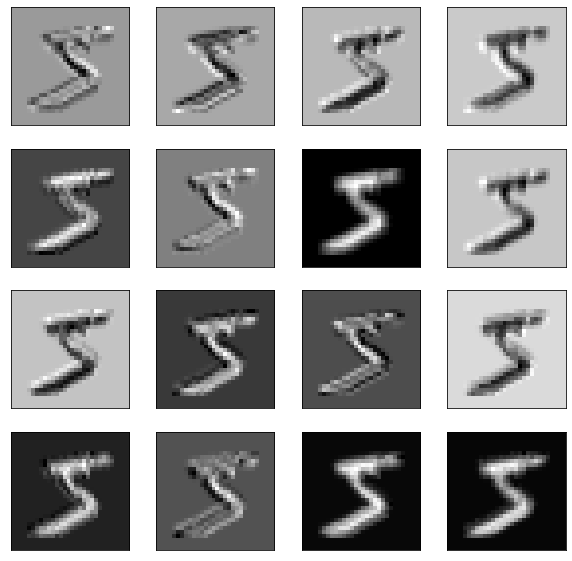

In [9]:
import tensorflow as tf
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()
train_images = train_images / 255.

x = train_images[0:16, :, :, None]
y = Conv2DTranspose(input_channels=1, output_channels=16, kernel_size=3)(x)
print(x.shape, y.shape)

import matplotlib.pyplot as plt

plt.imshow(x[0, :, :, 0], cmap=plt.cm.binary)
plt.xticks([]);plt.yticks([])
plt.show()

plt.figure(figsize=[10, 10])
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(y[0, :, :, i], cmap=plt.cm.binary)
    plt.xticks([]);plt.yticks([])
plt.show()